In [ ]:
## create freesurfer surface from .msh file of sim like this:
#^ msh2cortex -i MNI152_TMS_1-0001_No37_Magstim_double_cone_nii_scalar.msh -m ../m2m_MNI152  -o subject_overlays -f fsavg_overlays
#
# msh2nii.exe MNI152_TMS_1-0001_Magstim_70mm_Fig8_scalar.msh m2m_MNI152  dlpfc.nii.gz # DLPFC
# msh2nii.exe MNI152_TMS_1-0001_Magstim_70mm_Fig8_scalar.msh m2m_MNI152 ag.nii.gz   # AG

# NiLearn documentation
# https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_surf.html

In [2]:
from nilearn import datasets
from nilearn import plotting
from nilearn import surface
import nibabel as nb
import numpy as np
import pylab as plt
import matplotlib.pyplot as pltt


In [3]:
fsaverage = datasets.fetch_surf_fsaverage()
# For some reason we/Matthias used two different surfaces, one for AG and one for PFC: 
schaefer7_lh=surface.load_surf_data("./data/lh.Schaefer2018_400Parcels_7Networks_order.annot") # AG
schaefer17_lh=surface.load_surf_data("./data/lh.Schaefer2018_400Parcels_17Networks_order.annot") # PFC

# The specific region indices 
# A combination of three regions from the schaefer brain map 
dlpf_regions_indices = [128, 129, 131] # DLPFC #
lag_regions_indices = [162, 163] # AG 

schaefer17_lh[schaefer17_lh==129]=128
schaefer17_lh[schaefer17_lh==131]=128
schaefer7_lh[schaefer7_lh==163]=162

dlpfc_labels = ["DLPFC"]
lag_labels = ["left AG"]
dlpfc_new_regions=[128]
lag_new_regions=[162]

In [4]:
# stat_img_pz_dc="./simnibs_simulation_Pz_doublecone/nii/test_normE.nii.gz"
# stat_img_pz   ="./simnibs_simulation_Pz/nii/test_normE.nii.gz"
# stat_img_poz   ="./simnibs_simulation_POz/nii/test_normE.nii.gz"
# stat_img_cpz   ="./simnibs_simulation_CPz/nii/test_normE.nii.gz"
# texture_pz_dc = surface.vol_to_surf(stat_img_pz_dc, fsaverage.infl_left)
# texture_pz    = surface.vol_to_surf(stat_img_pz   , fsaverage.pial_right)
# texture_poz   = surface.vol_to_surf(stat_img_poz  , fsaverage.pial_right)
# texture_cpz   = surface.vol_to_surf(stat_img_cpz  , fsaverage.infl_right)

stat_img_dlpfc = "./data/dlpfc_normE.nii.gz"
texture_dlpfc_l = surface.vol_to_surf(stat_img_dlpfc, fsaverage.pial_left) # last is for different volums
texture_dlpfc_r = surface.vol_to_surf(stat_img_dlpfc, fsaverage.pial_right) # I assume this is what we need for the right hemisphere? 

### Pial picture (e.g., with sulci)

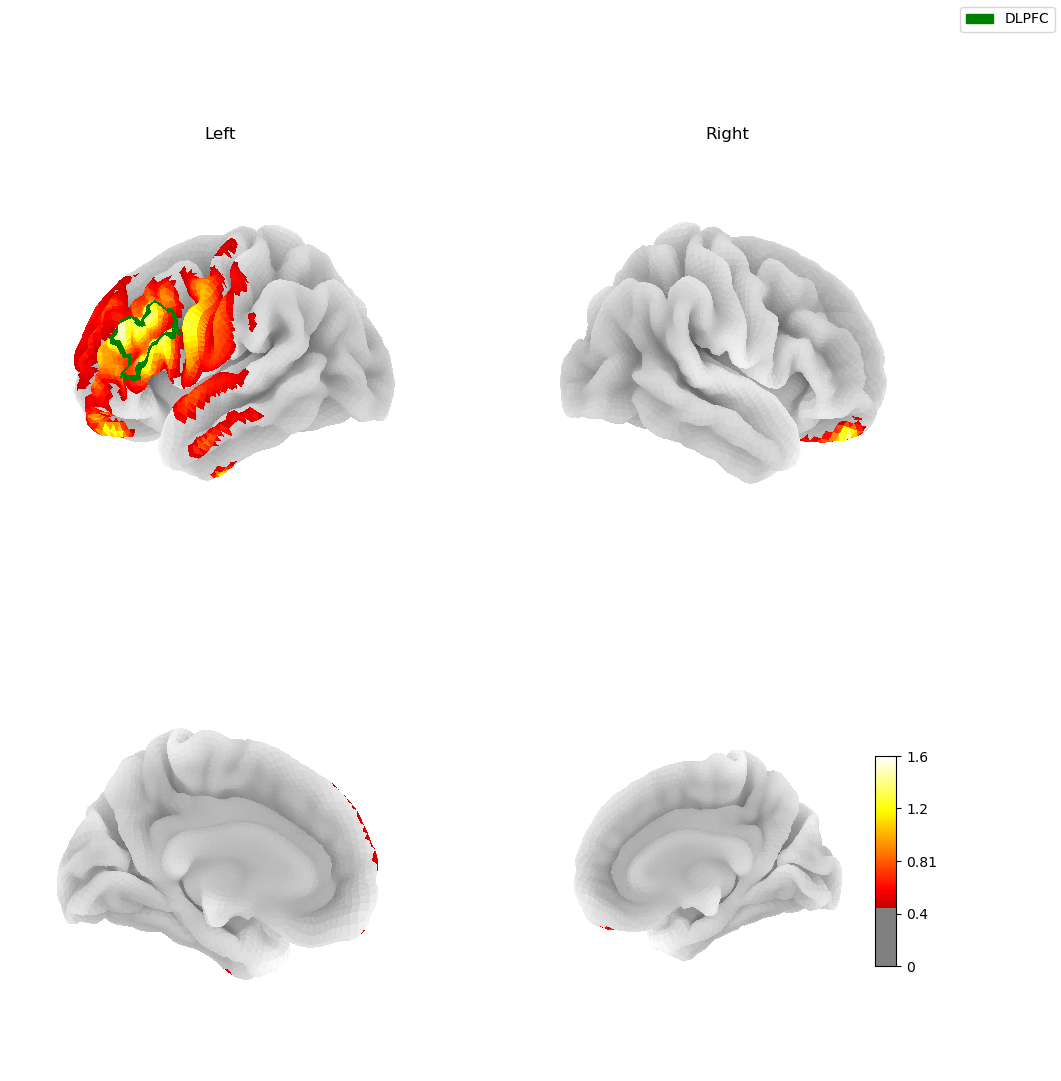

In [8]:
# Create figure and axes
fig, ((ax1,ax2),(ax3,ax4)) = pltt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={"projection": "3d"})

# .orig', '.pial', '.sphere', '.white', '.infla
# LEFT LATERAL
plotting.plot_surf_stat_map(fsaverage.pial_left, texture_dlpfc_l, bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="lateral", title='Left', threshold=.45, colorbar=False, 
                            figure=fig, axes=ax1); # TOP LEFT
      # area outline
plotting.plot_surf_contours(fsaverage.pial_left, schaefer17_lh, # things
                            labels=dlpfc_labels, levels=dlpfc_new_regions, # other things
                            legend=True, colors=['g'],
                            figure=fig, axes=ax1); # TOP LEFT

# LEFT MEDIAL
plotting.plot_surf_stat_map(fsaverage.pial_left, texture_dlpfc_l, bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="medial", title='', threshold=.45, colorbar=False,
                            figure=fig, axes=ax3); # BOTTOM LEFT

# RIGHT LATERAL
plotting.plot_surf_stat_map(fsaverage.pial_right, texture_dlpfc_r, bg_map=fsaverage.sulc_right, # things 
                            hemi='right', view="lateral", title='Right', threshold=.45, colorbar=False, 
                            figure=fig, axes=ax2); # TOP RIGHT

# RIGHT MEDIAL
plotting.plot_surf_stat_map(fsaverage.pial_right, texture_dlpfc_r, bg_map=fsaverage.sulc_right, # things 
                            hemi='right', view="medial", title='', threshold=.45, colorbar=True,
                            figure=fig, axes=ax4); # BOTTOM RIGHT

# Do I need a 5th picture to focus the colorbar in?
# This should keep the brain maps scaled correctly (at least) 
# And how the hell do I access individual components in plot? 

In [204]:
fig.savefig("pial_collection", dpi = 300)

### Inflated picture

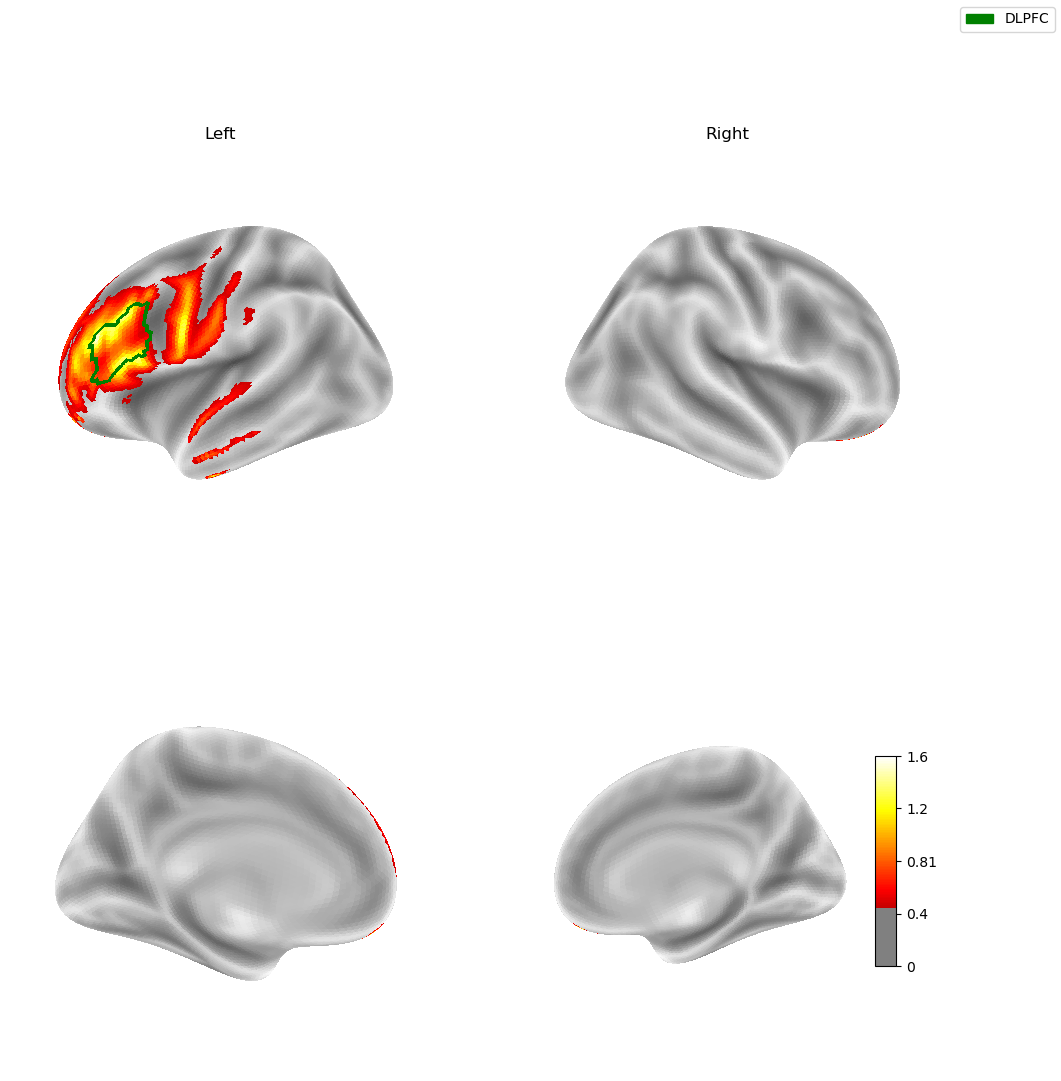

In [202]:
# Create figure and axes
fig1, ((ax1,ax2),(ax3,ax4)) = pltt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={"projection": "3d"})

# LEFT LATERAL
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_dlpfc_l, bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="lateral", title='Left', threshold=.45, colorbar=False, 
                            figure=fig1, axes=ax1); # TOP LEFT
# area outline
plotting.plot_surf_contours(fsaverage.infl_left, schaefer17_lh, # things
                            labels=dlpfc_labels, levels=dlpfc_new_regions, # other things
                            legend=True, colors=['g'],
                            figure=fig1, axes=ax1); # TOP LEFT

# LEFT MEDIAL
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_dlpfc_l, bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="medial", title='', threshold=.45, colorbar=False,
                            figure=fig1, axes=ax3); # BOTTOM LEFT

# RIGHT LATERAL
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_dlpfc_r, bg_map=fsaverage.sulc_right, # things 
                            hemi='right', view="lateral", title='Right', threshold=.45, colorbar=False, 
                            figure=fig1, axes=ax2); # TOP RIGHT

# RIGHT MEDIAL
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_dlpfc_r, bg_map=fsaverage.sulc_right, # things 
                            hemi='right', view="medial", title='', threshold=.45, colorbar=True,
                            figure=fig1, axes=ax4); # BOTTOM RIGHT


In [206]:
fig1.savefig("infl_collection", dpi = 300)

### transparent:

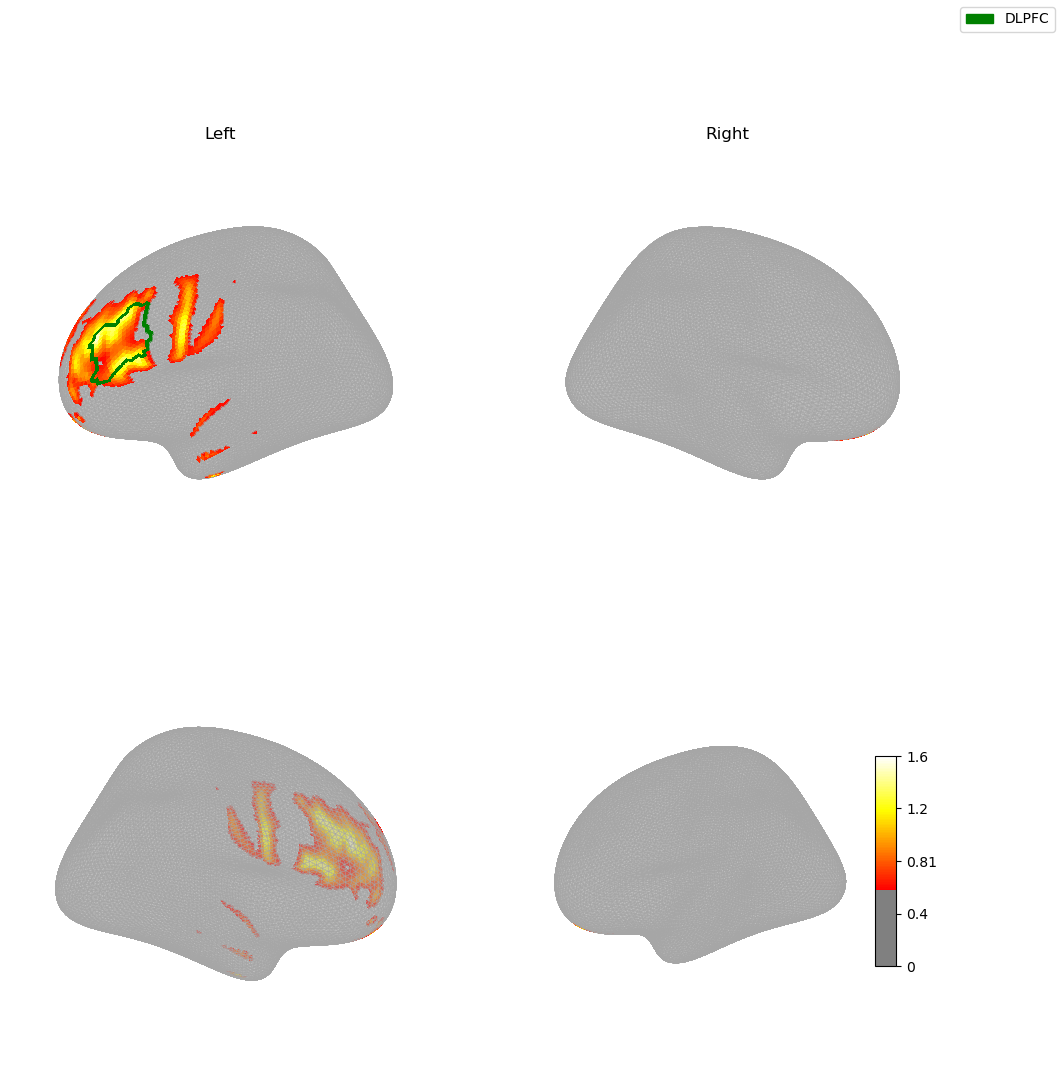

In [15]:
# Create figure and axes
fig2, ((ax1,ax2),(ax3,ax4)) = pltt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={"projection": "3d"})

# LEFT LATERAL
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_dlpfc_l, #bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="lateral", title='Left', threshold=.6, colorbar=False, 
                            figure=fig2, axes=ax1); # TOP LEFT
# area outline
plotting.plot_surf_contours(fsaverage.infl_left, schaefer17_lh, # things
                            labels=dlpfc_labels, levels=dlpfc_new_regions, # other things
                            legend=True, colors=['g'],
                            figure=fig2, axes=ax1); # TOP LEFT

# LEFT MEDIAL
plotting.plot_surf_stat_map(fsaverage.infl_left, texture_dlpfc_l, #bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="medial", title='', threshold=.6, colorbar=False,
                            figure=fig2, axes=ax3); # BOTTOM LEFT

# RIGHT LATERAL
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_dlpfc_r, #bg_map=fsaverage.sulc_right, # things 
                            hemi='right', view="lateral", title='Right', threshold=.6, colorbar=False, 
                            figure=fig2, axes=ax2); # TOP RIGHT

# RIGHT MEDIAL
plotting.plot_surf_stat_map(fsaverage.infl_right, texture_dlpfc_r, #bg_map=fsaverage.sulc_right, # things 
                            hemi='right', view="medial", title='', threshold=.6, colorbar=True,
                            figure=fig2, axes=ax4); # BOTTOM RIGHT


In [16]:
fig2.savefig("no_bk_collection", dpi = 300)

# testing

In [ ]:
# Create figure and axes
fig, ((ax1,ax2),(ax3,ax4)) = pltt.subplots(nrows=2, ncols=2, figsize=(12, 12), subplot_kw={"projection": "3d"})

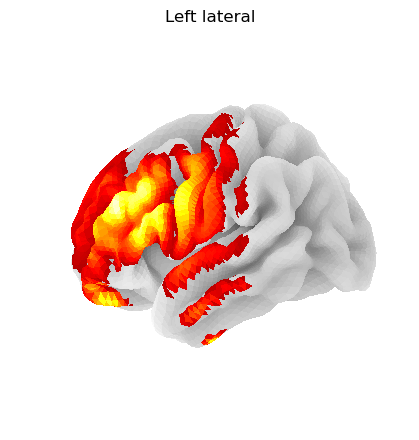

In [166]:
plotting.plot_surf_stat_map(fsaverage.pial_left, texture_dlpfc_l, bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="lateral", title='Left lateral', colorbar=False, display_mode={"x"},
                            threshold=.4
                            );

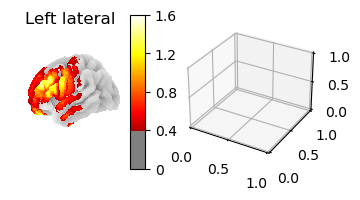

In [180]:
# Create figure and axes
fig1, (ax1,ax2) = pltt.subplots(nrows=1, ncols=2, figsize=(4,4), subplot_kw={"projection": "3d"})

plotting.plot_surf_stat_map(fsaverage.pial_left, texture_dlpfc_l, bg_map=fsaverage.sulc_left, # things 
                            hemi='left', view="lateral", title='Left lateral', colorbar=True
                            , threshold=.4,
                            fig=fig1, axes=ax1
                            );
# .orig', '.pial', '.sphere', '.white', '.infla

In [184]:
ax.imshow(fig1)

NameError: name 'ax' is not defined

testing2

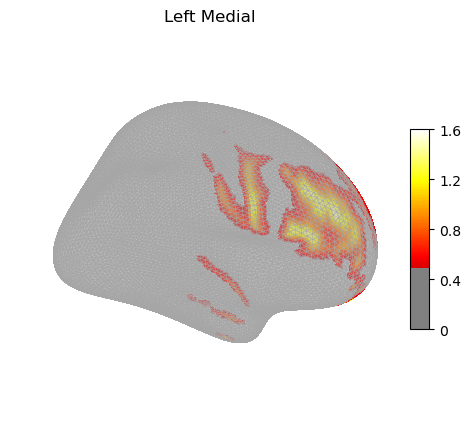

In [6]:
plotting.plot_surf_stat_map(surf_mesh=fsaverage.infl_left, stat_map=texture_dlpfc_l, #bg_map=fsaverage.sulc_left,
                            hemi='left', view="medial", title='Left Medial', threshold=.5
                            );

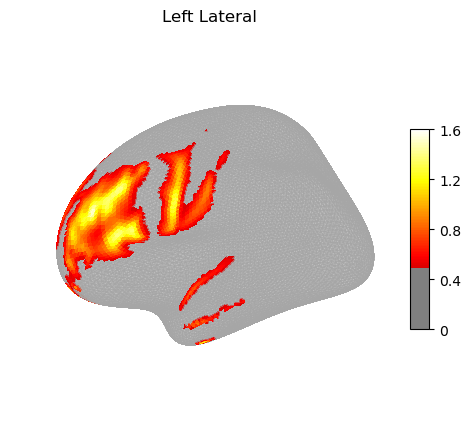

In [9]:
plotting.plot_surf_stat_map(surf_mesh=fsaverage.infl_left, stat_map=texture_dlpfc_l, #bg_map=fsaverage.sulc_left,
                            hemi='left', view="lateral", title='Left Lateral', threshold=.5
                            );

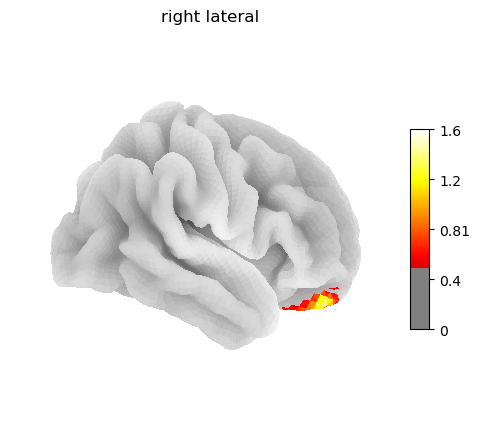

In [154]:
plotting.plot_surf_stat_map(surf_mesh=fsaverage.pial_right, stat_map=texture_dlpfc_r, bg_map=fsaverage.sulc_right,
                            hemi='right', view="lateral", title='right lateral'
                            , threshold=.5
                            );

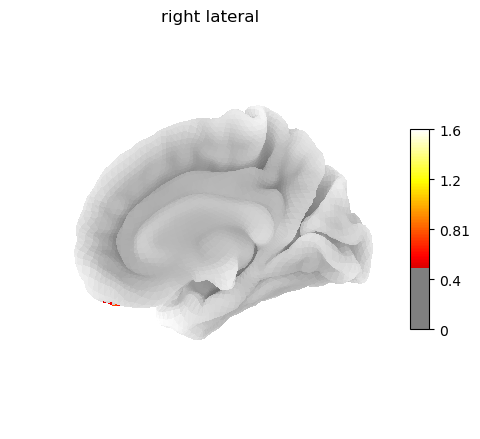

In [153]:
plotting.plot_surf_stat_map(surf_mesh=fsaverage.pial_right, stat_map=texture_dlpfc_r, bg_map=fsaverage.sulc_right,
                            hemi='right', view="medial", title='right medial'
                            , threshold=.5
                            );

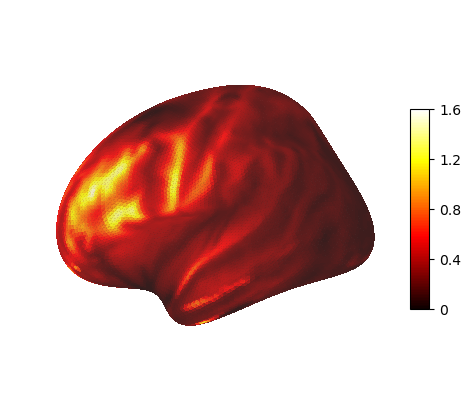

In [94]:
# left LATERAL
plotting.plot_surf_stat_map(surf_mesh=fsaverage.infl_left, 
                                 stat_map=texture_dlpfc_l,
                                 hemi="left", view="lateral",
                                 bg_on_data=True);

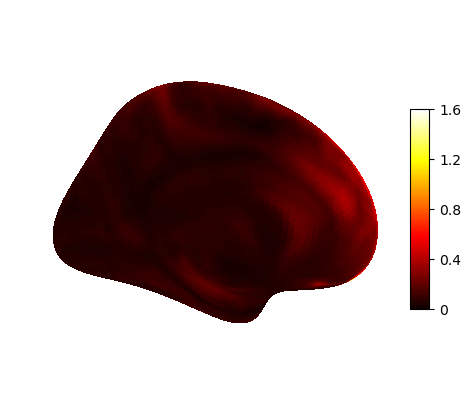

In [90]:
# left MEDIAL?
plotting.plot_surf_stat_map(surf_mesh=fsaverage.infl_left, 
                                 stat_map=texture_dlpfc_l,
                                 hemi="left", view="medial");

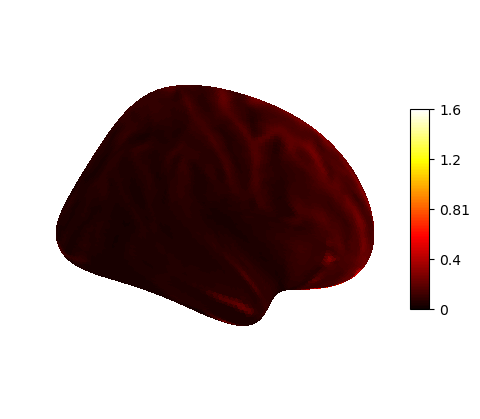

In [92]:
# right LATERAL
plotting.plot_surf_stat_map(surf_mesh=fsaverage.infl_right, 
                            stat_map=texture_dlpfc_r, 
                            hemi="right", view="lateral"
                            );

testing 

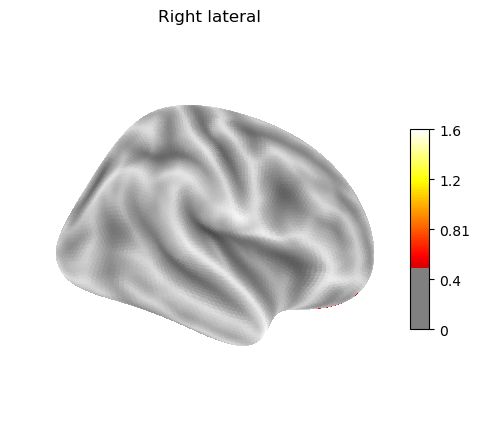

In [49]:

fig3=plotting.plot_surf_stat_map(fsaverage.infl_right, texture_dlpfc_r, hemi='right', view="lateral",
                            title='Right lateral', colorbar=True,
                            threshold=.5, bg_map=fsaverage.sulc_right);
# plotting.plot_surf_contours(fsaverage.infl_right, schaefer17_lh, labels=dlpfc_labels,
#                             levels=dlpfc_new_regions, figure=fig3, legend=True,
#                             colors=['g']);

#fig3.savefig("Right lateral.png", dpi = 200)

testing

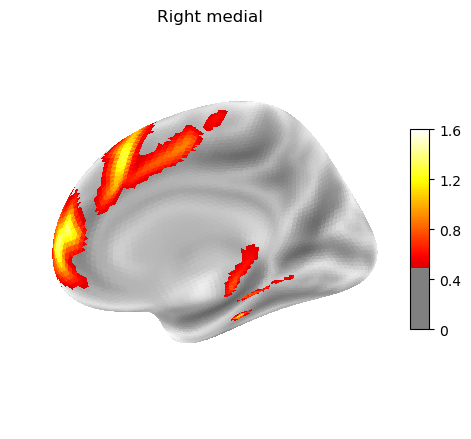

In [50]:

fig4=plotting.plot_surf_stat_map(fsaverage.infl_right, texture_dlpfc_l, hemi='right', view="medial",
                            title='Right medial', colorbar=True,
                            threshold=.5, bg_map=fsaverage.sulc_right);
# plotting.plot_surf_contours(fsaverage.infl_right, schaefer17_lh, labels=dlpfc_labels,
#                             levels=dlpfc_new_regions, figure=fig4, legend=True,
#                             colors=['g']);

#fig4.savefig("Right medial.png", dpi = 200)

In [51]:
# fig=plotting.plot_surf_stat_map(fsaverage.infl_left, texture_pz_dc, hemi='left', view="lateral",
#                             title='left AG', colorbar=True,
#                             threshold=.5, bg_map=fsaverage.sulc_left);
# plotting.plot_surf_contours(fsaverage.infl_left, schaefer7_lh, labels=lag_labels,
#                             levels=lag_new_regions, figure=fig, legend=True,
#                             colors=['g']);

In [52]:
fig1+fig2

TypeError: unsupported operand type(s) for +: 'Figure' and 'Figure'

In [ ]:
import matplotlib.pyplot as pltt
fig10, (ax1, ax2,ax3,ax4) = pltt.subplot(2,2, figsize=(10,5))

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>